In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [3]:
df=pd.read_csv('emails.csv')
df.head()

,ID,Label,Email
0,0,ham,"I don't have anybody's number, I still haven't..."
1,1,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
2,2,ham,She is our sister.. She belongs 2 our family.....
3,3,ham,Ya very nice. . .be ready on thursday
4,4,ham,Okie


In [4]:
df.shape

(4458, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      4458 non-null   int64 
 1   Label   4458 non-null   object
 2   Email   4458 non-null   object
dtypes: int64(1), object(2)
memory usage: 104.6+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

ID       0
Label    0
Email    0
dtype: int64

In [8]:
df.drop(columns=['ID'],axis=1,inplace=True)

In [9]:
df.sample(5)

,Label,Email
2431,ham,Well I wasn't available as I washob nobbing wi...
3836,spam,FREE UNLIMITED HARDCORE PORN direct 2 your mob...
2563,ham,Now i'm going for lunch.
2794,ham,Hope you are having a good week. Just checking in
3928,ham,Nope. Meanwhile she talk say make i greet you.


In [10]:
df.Label.value_counts()

Label
ham     3866
spam     592
Name: count, dtype: int64

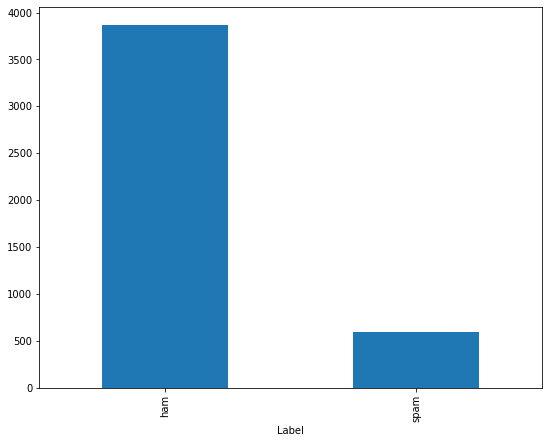

In [13]:
df['Label'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

In [14]:
df['spam']=df['Label'].apply(lambda x:1 if x=='spam' else 0)

In [15]:
df.head()

,Label,Email,spam
0,ham,"I don't have anybody's number, I still haven't...",0
1,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,1
2,ham,She is our sister.. She belongs 2 our family.....,0
3,ham,Ya very nice. . .be ready on thursday,0
4,ham,Okie,0


In [26]:
sw=stopwords.words('english')

In [28]:
lemmatizer=WordNetLemmatizer()

In [29]:
def text_preprocessing(text):
    text=text.lower()
    text=re.sub('[^a-z]',' ',text)
    text=re.sub('\s+[a-z]\s+',' ',text)
    text=re.sub('\s+',' ',text)
    words=text.split()
    words=[word for word in words if word not in sw]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [30]:
df['email_pre']=df['Email'].apply(text_preprocessing)

In [31]:
df.head()

,Label,Email,spam,email_pre
0,ham,"I don't have anybody's number, I still haven't...",0,anybody number still thought tactful way ask alex
1,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,1,congrats mobile videophones call videochat wid...
2,ham,She is our sister.. She belongs 2 our family.....,0,sister belongs family hope tomorrow pray fated...
3,ham,Ya very nice. . .be ready on thursday,0,ya nice ready thursday
4,ham,Okie,0,okie


In [32]:
df.drop(columns=['Label','Email'],axis='columns',inplace=True)

In [34]:
df.head()

,spam,email_pre
0,0,anybody number still thought tactful way ask alex
1,1,congrats mobile videophones call videochat wid...
2,0,sister belongs family hope tomorrow pray fated...
3,0,ya nice ready thursday
4,0,okie


In [38]:
X_train,X_test,y_train,y_test=train_test_split(df.email_pre,df.spam,test_size=0.2,random_state=101,shuffle=True)

In [39]:
X_train

744                                  ok msg b leave house
3150                                    say hi drugdealer
2788        lot used one babe model help youi bring match
4174                  boy late home father power frndship
2452                                     want come online
                              ...                        
4079    lay man let know missed thought great day send...
4171    raji pls favour pls convey birthday wish nimya...
599     win winner mr foley ipod exciting prize soon k...
1361    sad story man last week day wife nt wish paren...
1547    wondering would okay call uncle john let know ...
Name: email_pre, Length: 3566, dtype: object

In [41]:
X_train.shape

(3566,)

In [42]:
X_test

2246                       ok da already planned wil pick
520     depends quality want type sent boye faded glor...
1407                                                 like
3910                                okay seen pick friday
341                   say bold torch later one torch bold
                              ...                        
1453                         wah lucky man save money hee
3818                                   may call later pls
2848                       way send shade stuff wonderful
3063    adult would learn experience real danger dont ...
3781    freemsg awarded free mini digital camera reply...
Name: email_pre, Length: 892, dtype: object

In [43]:
X_test.shape

(892,)

In [45]:
y_train[:5]

744     0
3150    0
2788    0
4174    0
2452    0
Name: spam, dtype: int64

In [47]:
y_test[:5]

2246    0
520     0
1407    0
3910    0
341     0
Name: spam, dtype: int64

In [48]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [49]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [50]:
y_pred=clf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [51]:
y_test[:10]

2246    0
520     0
1407    0
3910    0
341     0
2189    0
1995    0
1838    0
1380    1
692     0
Name: spam, dtype: int64

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       772
           1       0.94      0.97      0.95       120

    accuracy                           0.99       892
   macro avg       0.97      0.98      0.97       892
weighted avg       0.99      0.99      0.99       892



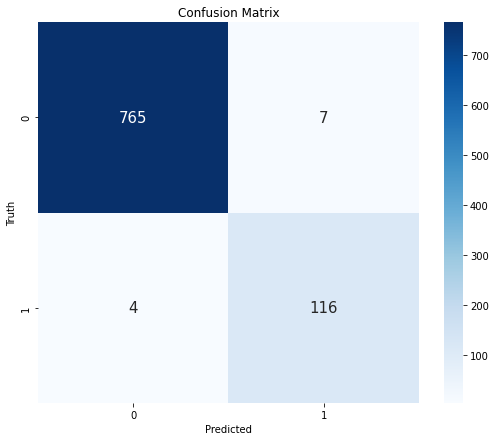

In [55]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [58]:
mails=['Hi, are you want teach in MIT university? if you interest about it, please let me know',
      'there is a gift for you. visit our website and take your gift']
clf.predict(mails)

array([0, 1], dtype=int64)